In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
# df = pd.read_csv('bank_data.csv',sep=';')
df = pd.read_csv('bank_data.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
df.shape

(41188, 21)

In [39]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [40]:
print(type(df.dtypes))
df.dtypes

<class 'pandas.core.series.Series'>


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [42]:
df1 = df.copy()

In [41]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

### Univariate and Bivariate Data Analysis

In [11]:
# Method - 1
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [12]:
# Method - 2
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [13]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

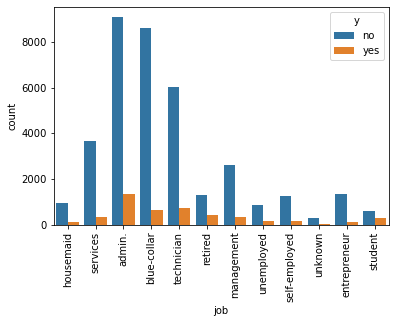

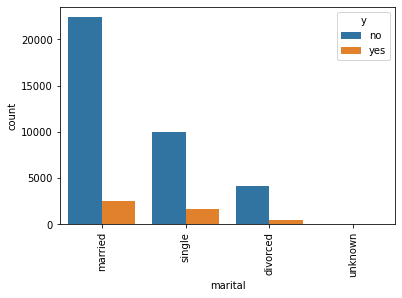

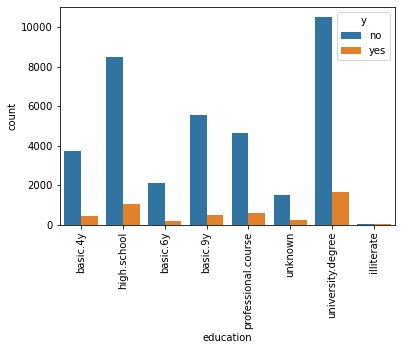

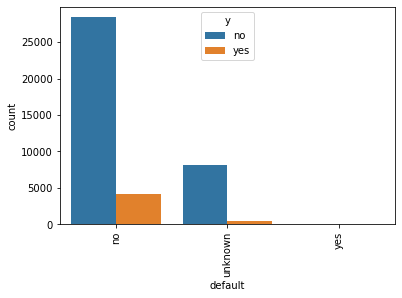

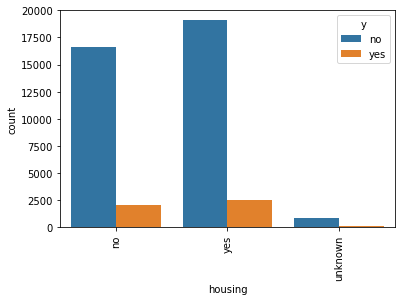

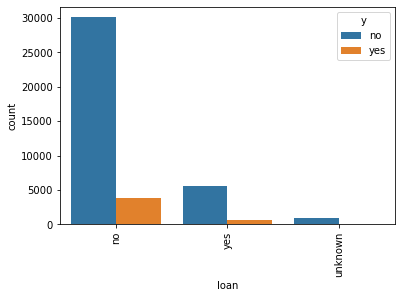

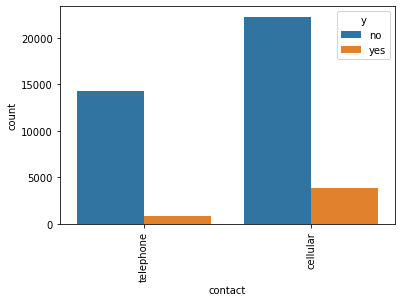

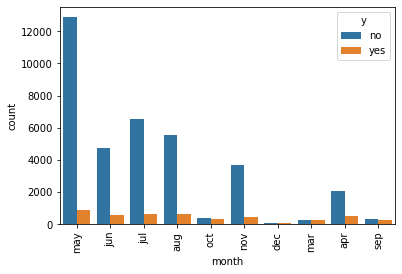

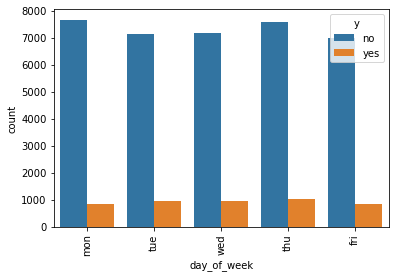

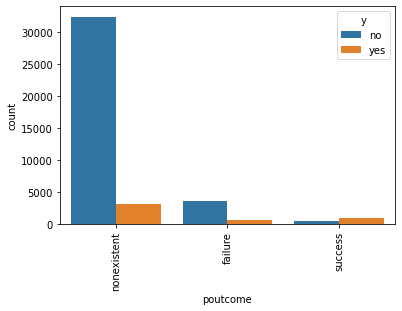

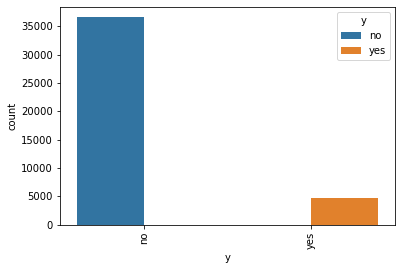

In [14]:
for i in cat_cols:
    sns.countplot(x=df[i],hue=df['y'])
    plt.xticks(rotation=90)
    plt.show()

In [15]:
# job, y
jobcount_wrt_y = df.groupby(['job','y'])['job'].count()
print(type(jobcount_wrt_y))
jobcount_wrt_y

<class 'pandas.core.series.Series'>


job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: job, dtype: int64

In [41]:
# print(jobcount_wrt_y.index)
# print(jobcount_wrt_y.values)

In [16]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [17]:
df['education'] = df['education'].replace(['basic.9y','basic.4y','basic.6y'],'basic')
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [18]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

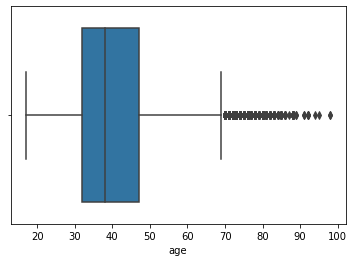

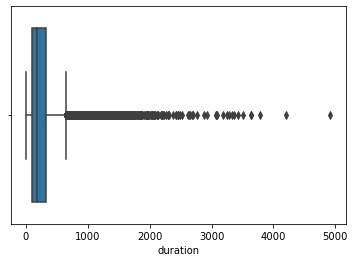

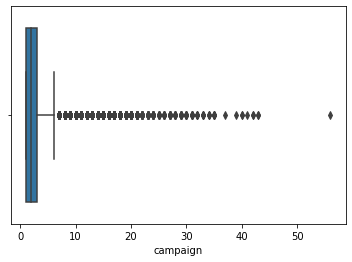

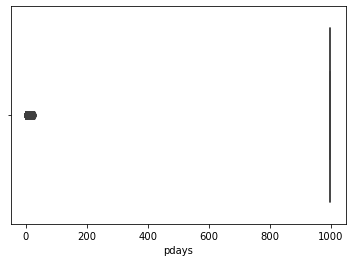

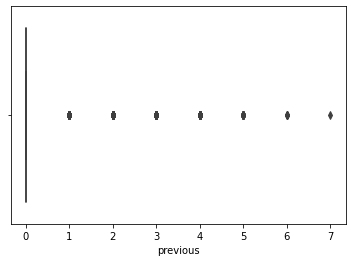

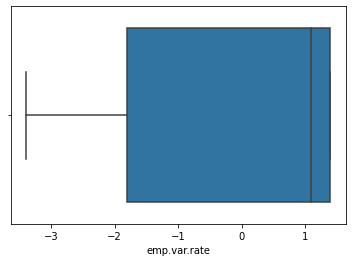

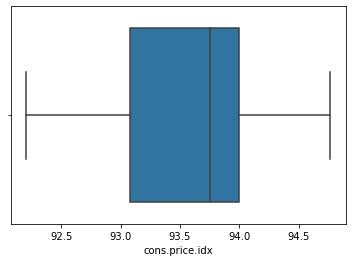

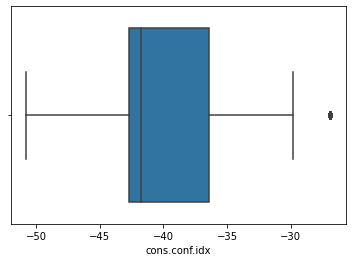

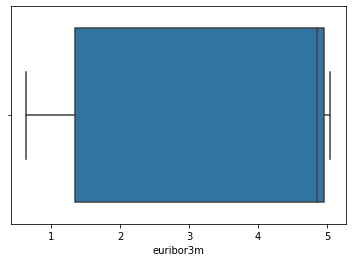

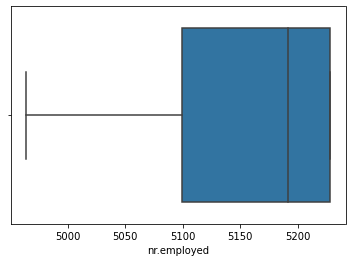

In [19]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

#### Cols with Outliers

In [20]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [21]:
# col_with_uol = ['age','duration','campaign']
# col_with_lol = ['pdays','previous']
col_with_ol = ['age','duration','campaign','pdays','previous']

In [22]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
age,41188.0,40.024060,10.421250,17.000,23.00000,24.000,25.000,26.000,38.000,58.000,59.000,59.000,62.000,71.000,98.000
duration,41188.0,258.285010,259.279249,0.000,11.00000,17.000,23.000,36.000,180.000,752.650,820.520,911.000,1052.260,1271.130,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.00000,1.000,1.000,1.000,2.000,7.000,8.000,9.000,11.000,14.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,3.00000,6.000,9.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.00000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,2.000,2.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-3.40000,-3.400,-3.000,-2.900,1.100,1.400,1.400,1.400,1.400,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,92.20100,92.379,92.431,92.713,93.749,94.465,94.465,94.465,94.465,94.465,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-49.50000,-47.100,-47.100,-47.100,-41.800,-33.600,-31.400,-31.400,-30.100,-26.900,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,0.65848,0.714,0.720,0.797,4.857,4.966,4.967,4.967,4.968,4.968,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,4963.60000,4991.600,4991.600,5017.500,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100,5228.100


In [23]:
def outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.02))
    return x

In [24]:
df[col_with_ol] = df[col_with_ol].apply(outlier_treatment)

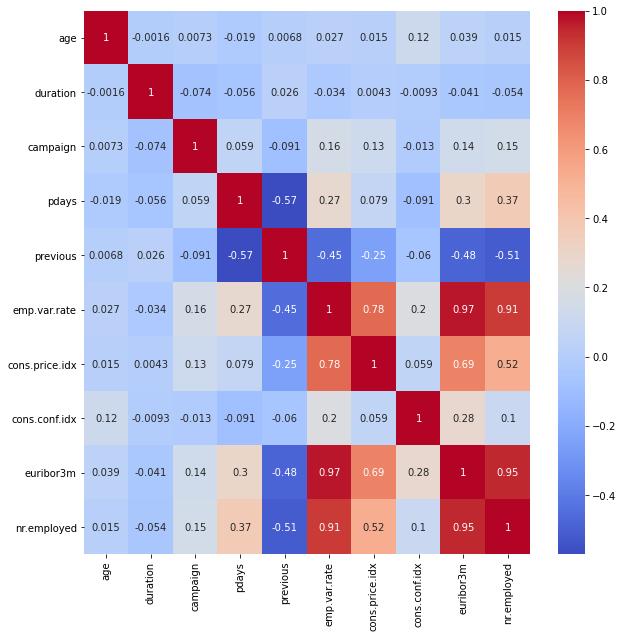

In [26]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### Inference
1) nr.employed and emp.var.rate has a corr of 0.91<br>
2) nr.employed and euribor.3m has a corr of 0.95<br>
3) eurobor.3m and emp.var.rate has a corr of 0.97<br>
4) cons.price.idx and emp.var.rate has a corr of 0.78<br>

### Feature Selection using Random Forest

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [28]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [30]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
# pd.get_dummies(data=df,drop_first=True)

In [31]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [52]:
df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [53]:
df['y'].value_counts()
# no     36548
# yes     4640

0    36548
1     4640
Name: y, dtype: int64

In [54]:
df['day_of_week'].value_counts()

2    8623
1    8514
4    8134
3    8090
0    7827
Name: day_of_week, dtype: int64

In [55]:
df1['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [56]:
x_train,y_train = df.iloc[:,:-1],df.iloc[:,-1]
print(x_train.shape)
print(y_train.shape)

(41188, 20)
(41188,)


In [57]:
x_train.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [58]:
m1 = RandomForestClassifier()
m1.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
feat_imp = m1.feature_importances_
features = x_train.columns
print(features)
print(feat_imp)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
[0.09189058 0.04821881 0.02394774 0.04344748 0.00885421 0.02022102
 0.01479648 0.00990883 0.01704285 0.04057944 0.32142    0.04218256
 0.03319335 0.01377606 0.02717227 0.02263702 0.02371864 0.02786727
 0.1050544  0.06407098]


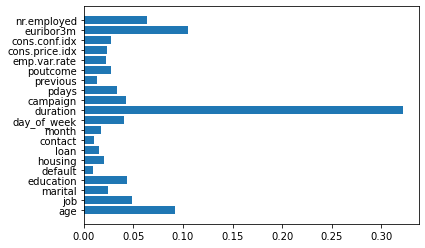

In [61]:
plt.barh(features,feat_imp)
plt.show()

In [63]:
fimp = pd.DataFrame({'Feature':features,'Feat_Imp':feat_imp})
fimp.sort_values(by='Feat_Imp',ascending=False)

,Feature,Feat_Imp
10,duration,0.321420
18,euribor3m,0.105054
0,age,0.091891
19,nr.employed,0.064071
1,job,0.048219
3,education,0.043447
11,campaign,0.042183
9,day_of_week,0.040579
12,pdays,0.033193
17,cons.conf.idx,0.027867


In [65]:
feat_imp_mean = feat_imp.mean()
print(feat_imp_mean)

0.05


In [67]:
thresh = 0.020
sig_cols = fimp[fimp['Feat_Imp']>thresh]
sig_cols['Feature'].values

array(['age', 'job', 'marital', 'education', 'housing', 'day_of_week',
       'duration', 'campaign', 'pdays', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype=object)

In [72]:
x = df[sig_cols['Feature'].values]
y = df['y']
print(x.shape)
print(y.shape)

(41188, 15)
(41188,)


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 15)
(10297, 15)
(30891,)
(10297,)


In [74]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [75]:
m2 = SVC(kernel='linear',C=1)
model_metrics(m2,x_train,x_test,y_train,y_test)

Training score 0.9036936324495808
Testing score 0.901039137612897
Predictions [0 0 0 ... 0 0 0]
[[8922  222]
 [ 797  356]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9144
           1       0.62      0.31      0.41      1153

    accuracy                           0.90     10297
   macro avg       0.77      0.64      0.68     10297
weighted avg       0.88      0.90      0.89     10297



In [4]:
# m3 = SVC(kernel='rbf',C=1,gamma=0.1)
# model_metrics(m3,x_train,x_test,y_train,y_test)

In [ ]:
# m4 = SVC(kernel='poly',C=1,degree=4)
# model_metrics(m4,x_train,x_test,y_train,y_test)

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
params = {'kernel':['linear','rbf'],
         'C':[0.001,0.01,0.1,1,10],
         'gamma':[0.01,0.1,1]}

In [80]:
import time

In [81]:
st = time.time()

s1 = SVC()
gs = GridSearchCV(s1,param_grid=params,scoring='accuracy',cv=5)
gs.fit(x_train,y_train)
et = time.time()

print(f'Time elapsed {et - st} sec')

KeyboardInterrupt: 